In [1]:
# important packages
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

#### Reading the data into dataframe

In [2]:
import pandas as pd
from io import StringIO

# Load the data from the attachment string

# Read the CSV data into a DataFrame
# Use only rows with data (non-empty rows)
df = pd.read_csv('dataframe.csv')
# Remove rows where all stock price columns are NaN
price_columns = [col for col in df.columns if any(keyword in col for keyword in ['open', 'close', 'high', 'low'])]
df = df.dropna(subset=price_columns, how='all')
df.head()

,Tick,$CARD open,$CARD close,$CARD high,$CARD low,$CARD volume,$CARD index,$CARD mid,$LOGN open,$LOGN close,...,$GARR volume,$GARR index,$GARR mid,$SIMP open,$SIMP close,$SIMP high,$SIMP low,$SIMP volume,$SIMP index,$SIMP mid
0,1547030,99602.0,99619.0,99902.0,99587.0,0.0,1546.0,99613.0,95800.0,95786.0,...,0.0,1546.0,101840.0,94834.0,94849.0,95119.0,94820.0,0.0,1546.0,94844.0
10,1548030,99604.0,99615.0,99756.0,99478.0,0.0,1547.0,99613.0,95737.0,95660.0,...,0.0,1547.0,101932.0,94724.0,94713.0,94850.0,94586.0,0.0,1547.0,94722.0
20,1549031,100171.0,100076.0,100199.0,99973.0,0.0,1548.0,100129.0,95727.0,95766.0,...,0.0,1548.0,102064.0,94549.0,94640.0,94747.0,94533.0,0.0,1548.0,94599.0
30,1550031,99147.0,99435.0,99635.0,99082.0,0.0,1549.0,99356.0,95705.0,95855.0,...,0.0,1549.0,102148.0,94797.0,94523.0,94983.0,94456.0,0.0,1549.0,94722.0
40,1551030,99285.0,99171.0,99312.0,98931.0,0.0,1550.0,99228.0,95807.0,95879.0,...,0.0,1550.0,101949.0,94899.0,94789.0,94924.0,94560.0,0.0,1550.0,94844.0


## Volatility 
Now let's calculate simple volatility

In [3]:
stocks = ['$CARD', '$LOGN', '$HEST', '$JUMP', '$GARR', '$SIMP']
volatility_data = {}

average_volatility = {}
for stock in stocks:
    high_col = f'{stock} high'
    low_col = f'{stock} low'
    open_col = f'{stock} open'
    valid_rows = df[(df[high_col] > 0) & (df[low_col] > 0) & (df[open_col] > 0)]
    if not valid_rows.empty:
        volatility = (valid_rows[high_col] - valid_rows[low_col]) / valid_rows[open_col]
        average_volatility[stock] = volatility.mean()
    else:
        average_volatility[stock] = None

average_volatility

{'$CARD': np.float64(0.003206901261912912),
 '$LOGN': np.float64(0.0030840275728083355),
 '$HEST': np.float64(0.003206532363974981),
 '$JUMP': np.float64(0.003206606691981043),
 '$GARR': np.float64(0.0032063837906641086),
 '$SIMP': np.float64(0.003206656587166957)}

## Volatility 2
Let's calculate realized volatility

In [4]:
price_columns = [col for col in df.columns if 'open' in col or 'close' in col]
df_clean = df.dropna(subset=price_columns, how='all')

# Calculate daily returns for each stock based on close prices
returns = {}
for stock in ['$CARD', '$LOGN', '$HEST', '$JUMP', '$GARR', '$SIMP']:
    close_col = f'{stock} close'
    df_clean[close_col] = pd.to_numeric(df_clean[close_col], errors='coerce')
    returns[stock] = df_clean[close_col].pct_change()

# Calculate realized volatility as annualized standard deviation of daily returns
# Assuming 252 trading days in a year
realized_vol = {}
for stock in returns:
    realized_vol[stock] = np.sqrt(252) * returns[stock].std()

realized_vol

{'$CARD': np.float64(0.07653907506367029),
 '$LOGN': np.float64(0.023498289141553254),
 '$HEST': np.float64(0.05999854530270477),
 '$JUMP': np.float64(0.02365750635205501),
 '$GARR': np.float64(0.020855067514627096),
 '$SIMP': np.float64(0.02327732310378328)}

Some info about dataframe

In [5]:
df.describe()

,Tick,$CARD open,$CARD close,$CARD high,$CARD low,$CARD volume,$CARD index,$CARD mid,$LOGN open,$LOGN close,...,$GARR volume,$GARR index,$GARR mid,$SIMP open,$SIMP close,$SIMP high,$SIMP low,$SIMP volume,$SIMP index,$SIMP mid
count,2.600000e+02,260.000000,260.000000,260.000000,260.000000,260.0,260.000000,260.000000,260.000000,260.000000,...,260.0,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.0,260.000000,260.000000
mean,1.676531e+06,99878.019231,99882.742308,100050.069231,99729.834615,0.0,1675.500000,99895.684615,96318.207692,96326.742308,...,0.0,1675.500000,104446.819231,95365.096154,95370.684615,95535.511538,95229.723077,0.0,1675.500000,95382.511538
std,7.519941e+04,994.972064,984.448280,989.488739,991.903871,0.0,75.199734,989.110856,1480.994947,1480.190369,...,0.0,75.199734,1240.158588,611.746486,610.833509,620.784660,617.332861,0.0,75.199734,609.765285
min,1.547030e+06,97493.000000,97621.000000,97849.000000,97364.000000,0.0,1546.000000,97576.000000,94203.000000,94274.000000,...,0.0,1546.000000,101835.000000,94273.000000,94308.000000,94435.000000,94024.000000,0.0,1546.000000,94356.000000
25%,1.611782e+06,99262.500000,99281.500000,99433.750000,99080.000000,0.0,1610.750000,99356.000000,95078.750000,95096.500000,...,0.0,1610.750000,103510.000000,94743.750000,94763.750000,94923.750000,94624.000000,0.0,1610.750000,94722.000000
50%,1.676531e+06,99761.000000,99757.500000,99909.500000,99597.000000,0.0,1675.500000,99742.000000,95808.500000,95795.500000,...,0.0,1675.500000,104770.000000,95509.500000,95501.500000,95680.500000,95380.500000,0.0,1675.500000,95582.000000
75%,1.741281e+06,100443.500000,100444.750000,100677.250000,100290.500000,0.0,1740.250000,100420.250000,97412.250000,97424.250000,...,0.0,1740.250000,105451.500000,95835.000000,95830.000000,95985.500000,95692.500000,0.0,1740.250000,95829.000000
max,1.806029e+06,102682.000000,102509.000000,102757.000000,102467.000000,0.0,1805.000000,102615.000000,99569.000000,99546.000000,...,0.0,1805.000000,106463.000000,96595.000000,96785.000000,97188.000000,96527.000000,0.0,1805.000000,96699.000000


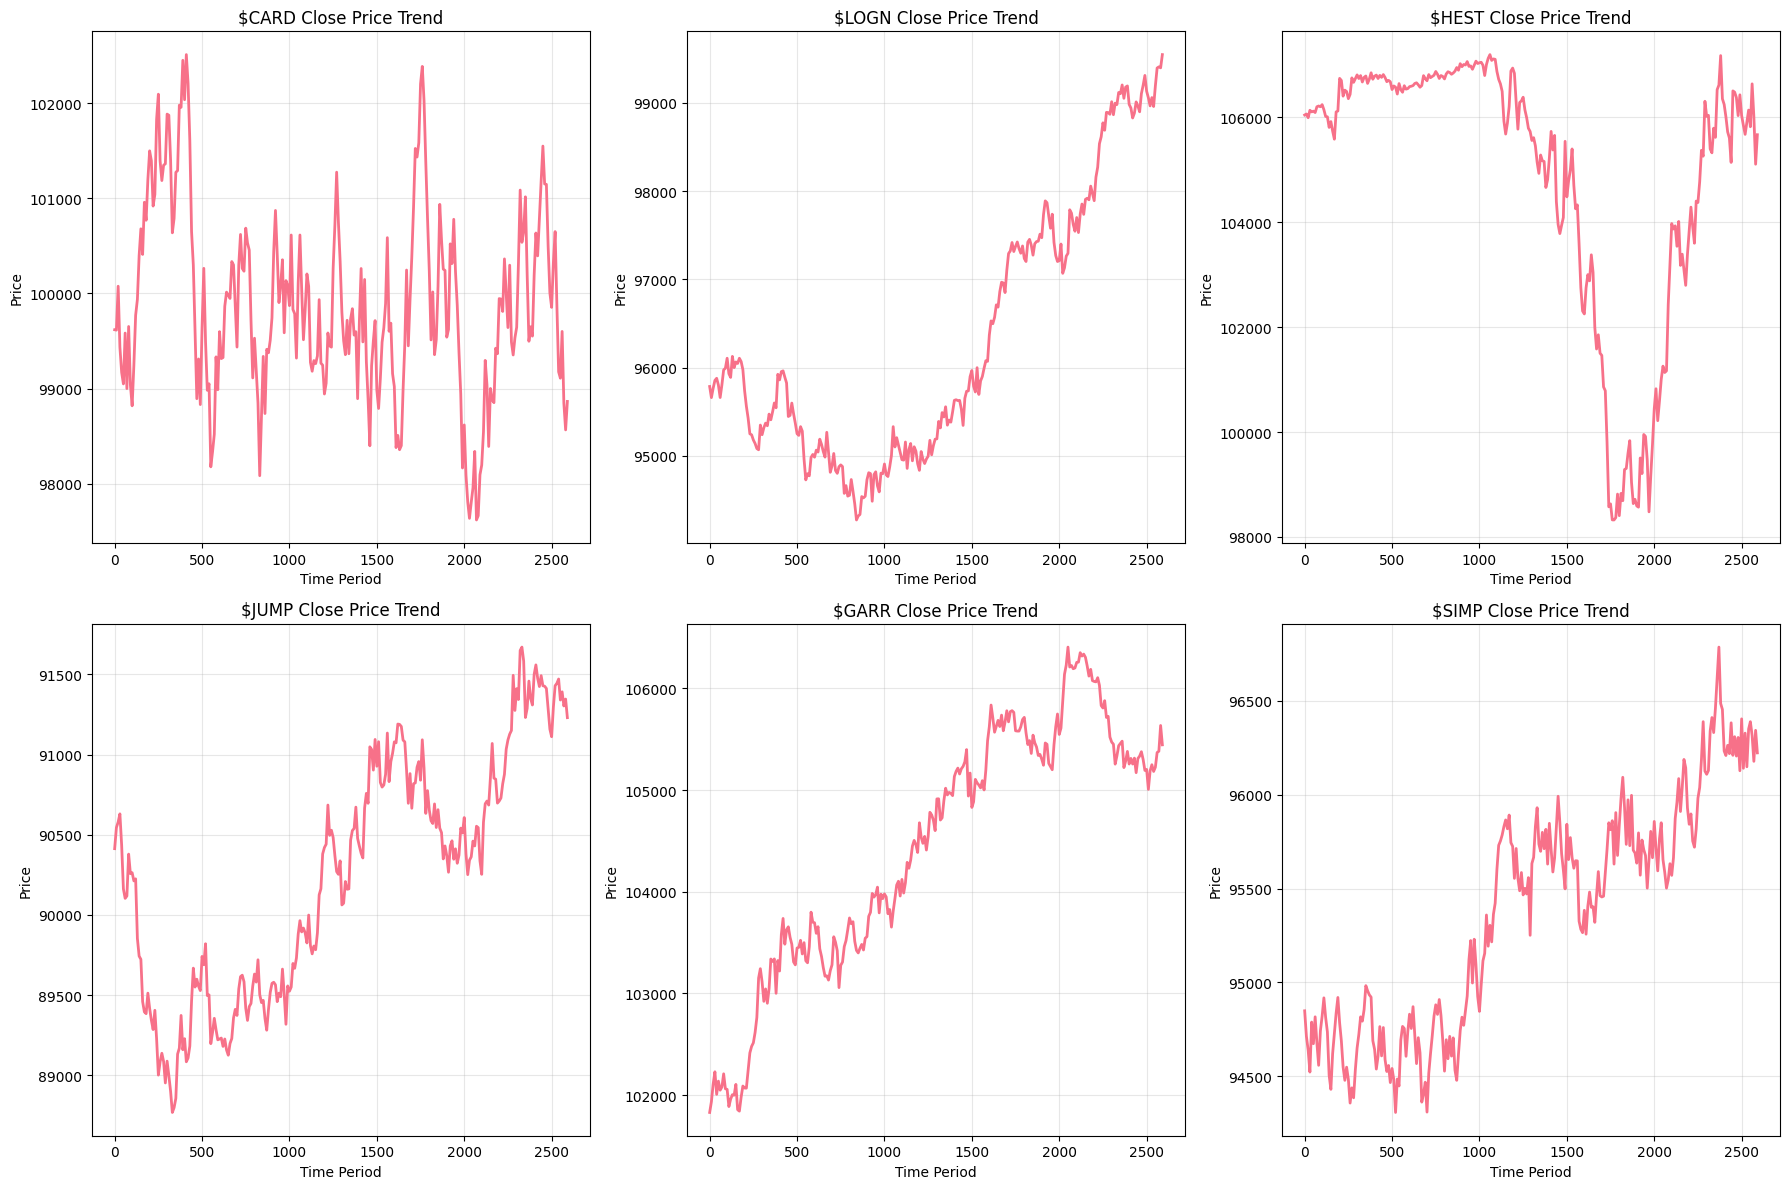

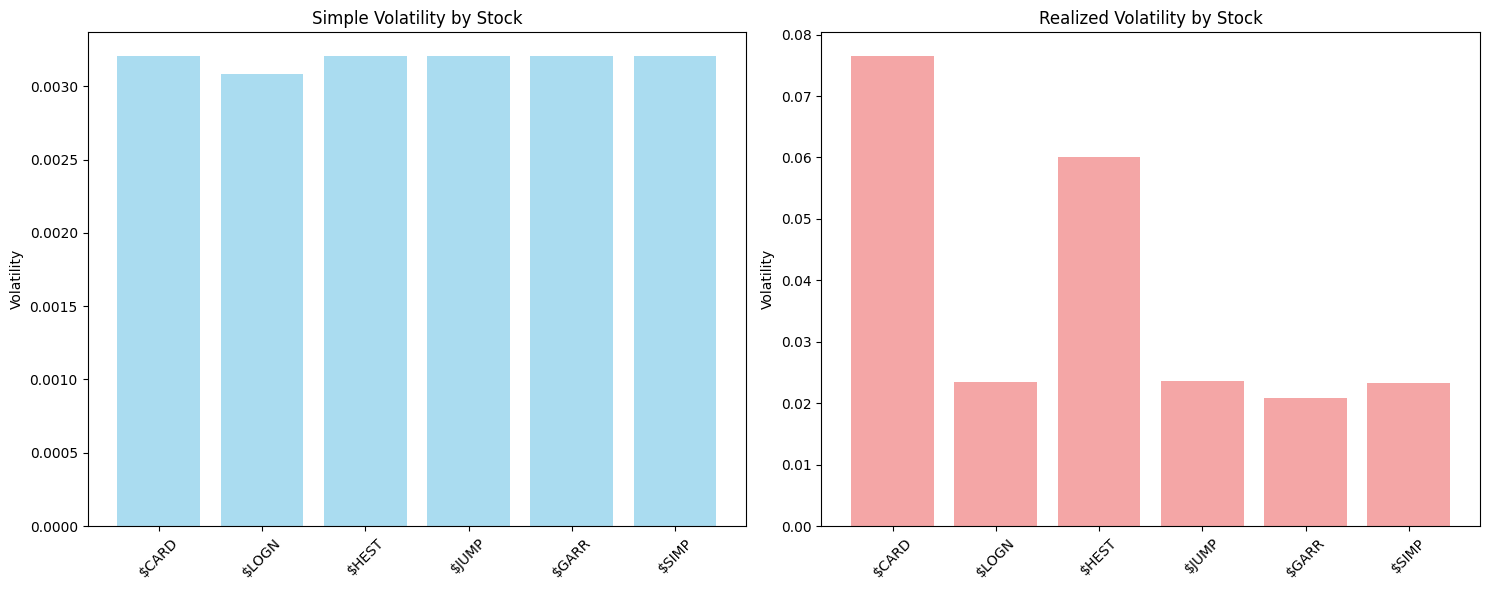

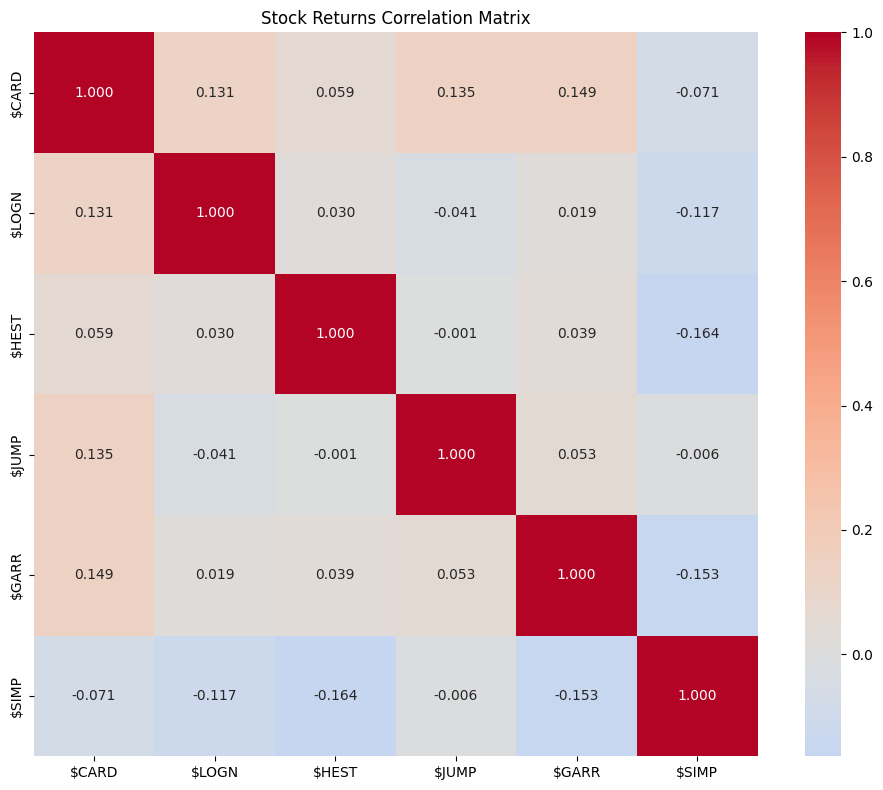

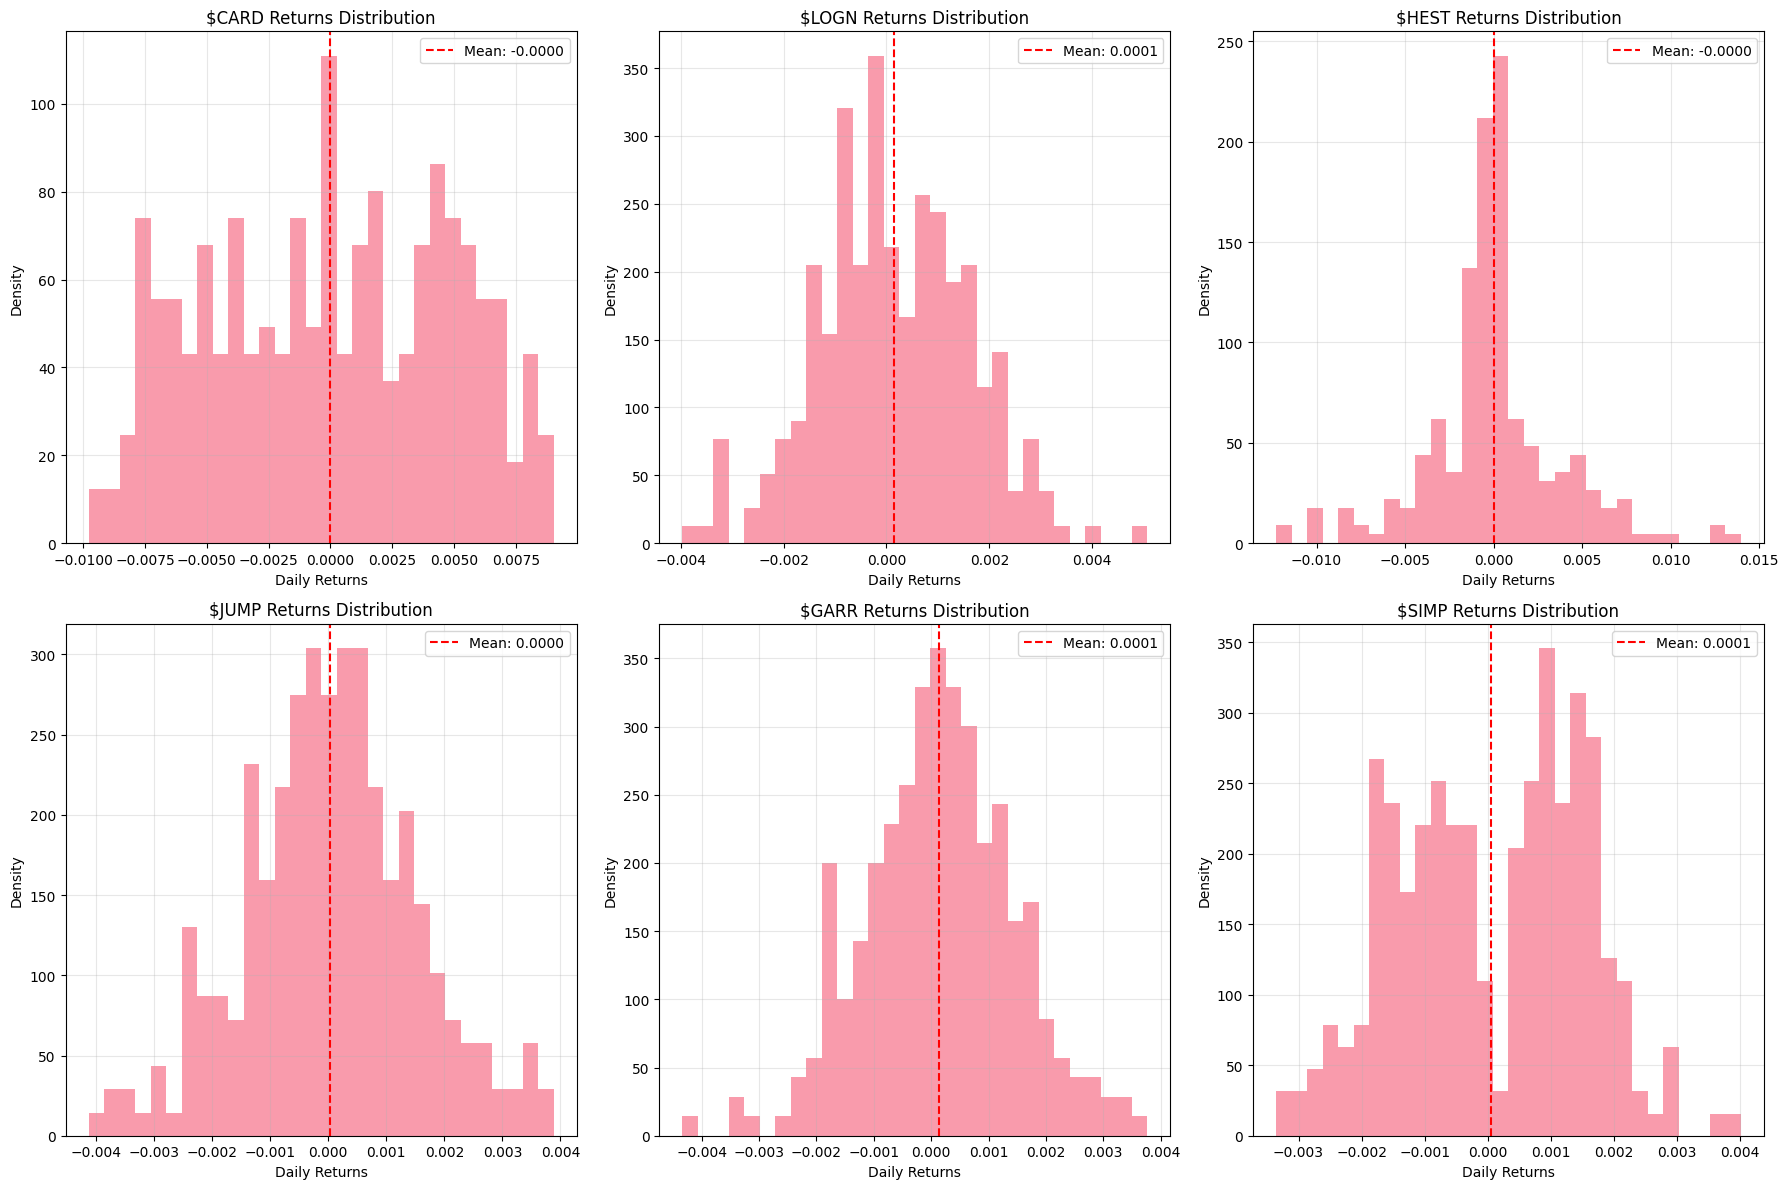

ML Features Summary:
       $CARD_price_range  $CARD_daily_return  $CARD_volatility_5d  \
count         260.000000          259.000000           255.000000   
mean            0.003207           -0.000018             0.004724   
std             0.001665            0.004822             0.001297   
min             0.000544           -0.009773             0.001379   
25%             0.002124           -0.004030             0.003705   
50%             0.002923           -0.000040             0.004718   
75%             0.004075            0.004321             0.005607   
max             0.013863            0.009024             0.008247   

       $CARD_volatility_10d  $CARD_price_momentum  $LOGN_price_range  \
count            250.000000            255.000000         260.000000   
mean               0.004838             -0.000065           0.003084   
std                0.000762              0.010066           0.001573   
min                0.002863             -0.032405           0.000492 

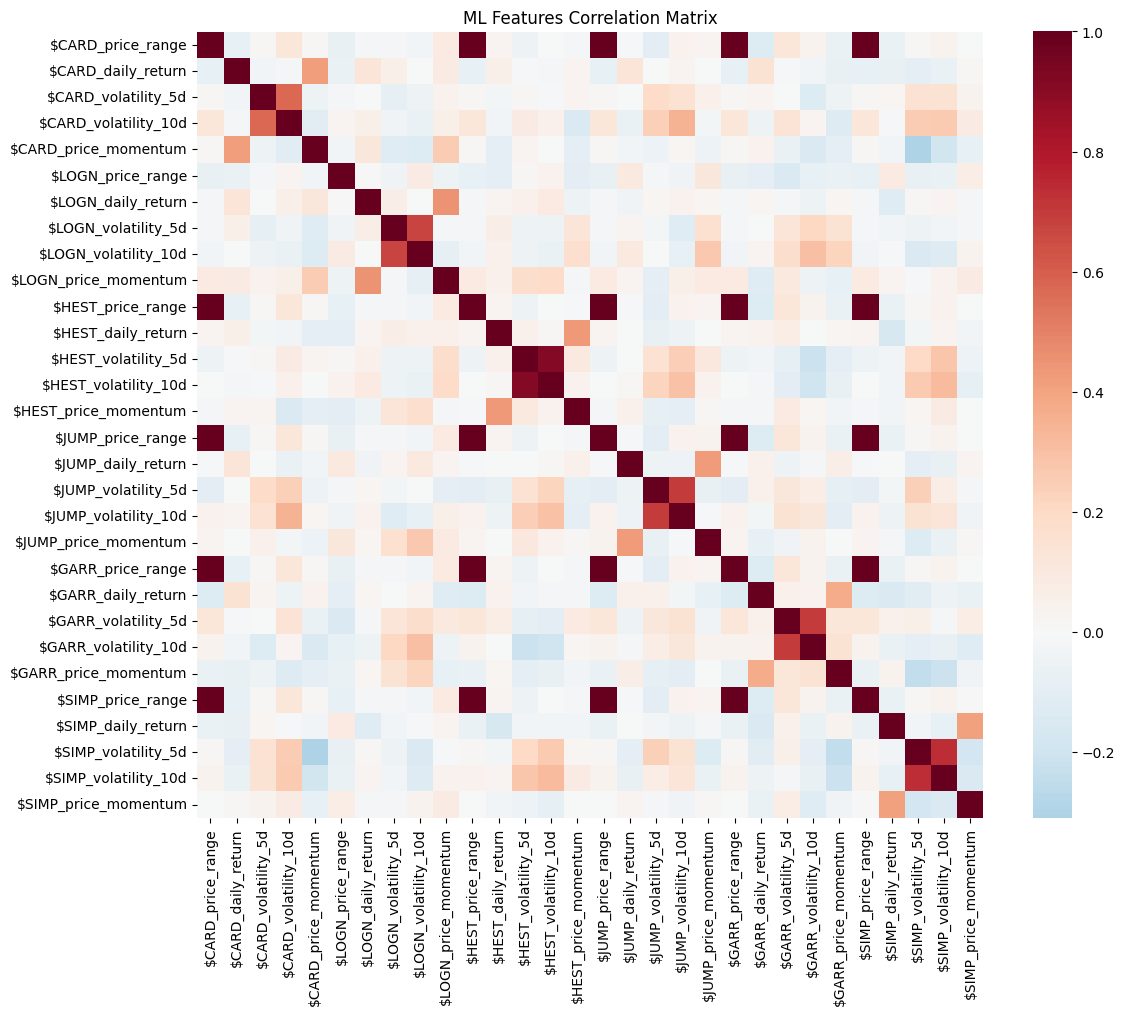


Dataset shape for ML: (260, 30)
Features available: ['$CARD_price_range', '$CARD_daily_return', '$CARD_volatility_5d', '$CARD_volatility_10d', '$CARD_price_momentum', '$LOGN_price_range', '$LOGN_daily_return', '$LOGN_volatility_5d', '$LOGN_volatility_10d', '$LOGN_price_momentum', '$HEST_price_range', '$HEST_daily_return', '$HEST_volatility_5d', '$HEST_volatility_10d', '$HEST_price_momentum', '$JUMP_price_range', '$JUMP_daily_return', '$JUMP_volatility_5d', '$JUMP_volatility_10d', '$JUMP_price_momentum', '$GARR_price_range', '$GARR_daily_return', '$GARR_volatility_5d', '$GARR_volatility_10d', '$GARR_price_momentum', '$SIMP_price_range', '$SIMP_daily_return', '$SIMP_volatility_5d', '$SIMP_volatility_10d', '$SIMP_price_momentum']


In [6]:
# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# 1. Plot price trends for all stocks
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, stock in enumerate(stocks):
    close_col = f'{stock} close'
    df_plot = df[df[close_col] > 0].copy()
    df_plot[close_col] = pd.to_numeric(df_plot[close_col], errors='coerce')
    
    axes[i].plot(df_plot.index, df_plot[close_col], linewidth=2)
    axes[i].set_title(f'{stock} Close Price Trend')
    axes[i].set_xlabel('Time Period')
    axes[i].set_ylabel('Price')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Volatility comparison
vol_df = pd.DataFrame({
    'Stock': stocks,
    'Simple_Volatility': [average_volatility[stock] for stock in stocks],
    'Realized_Volatility': [realized_vol[stock] for stock in stocks]
})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Simple volatility
ax1.bar(vol_df['Stock'], vol_df['Simple_Volatility'], color='skyblue', alpha=0.7)
ax1.set_title('Simple Volatility by Stock')
ax1.set_ylabel('Volatility')
ax1.tick_params(axis='x', rotation=45)

# Realized volatility
ax2.bar(vol_df['Stock'], vol_df['Realized_Volatility'], color='lightcoral', alpha=0.7)
ax2.set_title('Realized Volatility by Stock')
ax2.set_ylabel('Volatility')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 3. Correlation matrix of returns
returns_df = pd.DataFrame(returns).dropna()
correlation_matrix = returns_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Stock Returns Correlation Matrix')
plt.tight_layout()
plt.show()

# 4. Distribution of returns for each stock
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, stock in enumerate(stocks):
    returns_clean = returns[stock].dropna()
    axes[i].hist(returns_clean, bins=30, alpha=0.7, density=True)
    axes[i].axvline(returns_clean.mean(), color='red', linestyle='--', 
                   label=f'Mean: {returns_clean.mean():.4f}')
    axes[i].set_title(f'{stock} Returns Distribution')
    axes[i].set_xlabel('Daily Returns')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Create features for ML model
ml_features = pd.DataFrame()

for stock in stocks:
    # Price features
    high_col = f'{stock} high'
    low_col = f'{stock} low'
    open_col = f'{stock} open'
    close_col = f'{stock} close'
    
    # Clean and convert to numeric
    for col in [high_col, low_col, open_col, close_col]:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculate technical indicators
    ml_features[f'{stock}_price_range'] = (df[high_col] - df[low_col]) / df[open_col]
    ml_features[f'{stock}_daily_return'] = returns[stock]
    ml_features[f'{stock}_volatility_5d'] = returns[stock].rolling(5).std()
    ml_features[f'{stock}_volatility_10d'] = returns[stock].rolling(10).std()
    ml_features[f'{stock}_price_momentum'] = df[close_col].pct_change(5)

# Display feature statistics
print("ML Features Summary:")
print(ml_features.describe())

# 6. Feature correlation for ML
plt.figure(figsize=(12, 10))
feature_corr = ml_features.corr()
sns.heatmap(feature_corr, cmap='RdBu_r', center=0, square=True, fmt='.2f')
plt.title('ML Features Correlation Matrix')
plt.tight_layout()
plt.show()

print(f"\nDataset shape for ML: {ml_features.shape}")
print(f"Features available: {list(ml_features.columns)}")